# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
10.02.2024<br>
**Rabindra Manandhar**<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

This document was created to learn to use neural networks to make an expert system to support in diagnostic decision making. The objective was to read and preprocess the 'Heart Disease Health Indicators Dataset' from Kaggle and create and train a dense neural network to predict to classify the presence of heart disease.

## 2. Setup

Libraries/modules that were used are -

files,drive - to interact with fiels and Google Drive.

os - os module allows to access os functionalities and interact with the underlying os that Python is running on.

pandas - to use tabulated data

matplotlib, seaborn - to visualize/make graphical presentations of the training results

scikit-learn - it provides a wide range of tools for building machine learning models

In [1]:
# Import some functions and libraries
from google.colab import files, drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [2]:
# mount the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Dataset


The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984.

For this project, I used a dataset available on Kaggle for the year 2015. The dataset originally has 330 features (columns), but based on heart disease research regarding factors influencing heart disease and other chronic health conditions, only select features are included in this analysis.

In [3]:
# List the contents of the dataset_path
dataset_path = f'/content/drive/MyDrive/input'
os.listdir(dataset_path)

['heart_disease_health_indicators_BRFSS2015.csv']

* Loading data

  The dataframe was loaded using pandas read_csv() method


In [4]:
df = pd.read_csv(dataset_path + '/heart_disease_health_indicators_BRFSS2015.csv')

* How to take a sample from dataset?

  Pandas' sample() method can be used to take a sample from dataframe.


In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


* What features (columns) are there?

  Using Pandas' info() method and pandas.columns attirbute, we can output the features/columns of a dataframe.

  pd.info() - To get concise summary information of a dataframe, including data types, memory usage, non-null values in each column.

  pd.column - To get pandas index object containing the column labels of a dataframe.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## 4. Preprocessing

Instructions: Describe:

- how the missing values are handled
- conversion of textual and categorical data into numerical values (if needed)
- how the data is splitted into train, validation and test sets
- the features (=input) and labels (=output), and
- how the features are normalized or scaled

* How many missing values are there?

  Pandas' isnull().sum() methods can be used to check the missing values in the dataframe.

In [8]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

The output shows that the dataframe has no missing values.


* How to check if there is textual categorical data in the dataframe?

The output shows all columns have numerical values. Hence, no conversion is required.

`Note`: Use one-Hot Encoding to convert textual and categorical data to numerical values.

Example: df_encoded = pd.get_dummies(df, columns=['column_name'], prefix='column_name')

* Splitting data into train and test datasets

In [9]:
# Split the data into train (80%) and test datasets (20%)
train_dataset_frac = df.sample(frac=0.8, random_state=0)
train_dataset = train_dataset_frac.sample(n=20000, random_state=0)
test_dataset = df.drop(train_dataset.index)

* Separation of features and labels

In [10]:
# Separate the features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [11]:
train_features.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [12]:
#pop takes
train_labels = train_features.pop('HeartDiseaseorAttack')
test_labels = test_features.pop('HeartDiseaseorAttack')

In [13]:
FEATURES = len(train_features.columns)
print("Number of features:", FEATURES)

Number of features: 21


* Feature Normalization

In [14]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(train_features))

## 5. Modeling

We use a rule of thumb for number of neurons in hidden layers:

$N_{hidden} = \sqrt{N_{input} + N_{output}}$

where

- $N_{input}$ is the number of input features
- $N_{output}$ is the number of output labels

In [15]:
N_HIDDEN = round(np.sqrt(FEATURES + 1))
print("Number of neurons in hidden layers:", N_HIDDEN)

Number of neurons in hidden layers: 5


Instructions: Write a short description of the model:

- selected loss, optimizer and metrics settings, and
- the summary of the selected model architecture.

The dataset typically involves predicting the presence or absence of heart disease based on various health indicators and risk factors. In most analyses of this dataset, the target variable is binary, indicating whether a patient has heart disease (positive class) or does not have heart disease (negative class). Therefore, it's commonly treated as a `binary classification` problem in machine learning applications.

Architecture of the model: one input layer (Dense with ReLU activation), one hidden layer (Dense with ReLU activation) and one output layer (Dense with sigmoid activation). The Dense layer represents a fully connected layer. ReLU activation function is commonly used in hidden layers of neural networks to introduce non-linearity and enable the model to learn complex patterns in the data.

In [16]:
# Build the neural network model and add to the model the missing layers
model = keras.Sequential(
    [
      normalizer,
      layers.Dense(FEATURES, activation = 'relu', name = "input"),
      layers.Dense(N_HIDDEN, activation = 'relu', name = "hidden"),
      layers.Dense(1, activation = 'sigmoid', name = "output")
    ]
)

## 6. Compiling

To make the model ready for training, we need to pick three more things as part of the compilation step:

An optimizer — The mechanism through which the model will update the weights of the neural network based on the training data it sees during training , so as to improve its performance i.e. to minimize the loss function.

A loss function — How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

Metrics - to monitor and evaluate the performance of the model during training and testing — Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [17]:
# Compile the model
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer=optimizers.Adam(),
              metrics=tf.metrics.BinaryAccuracy())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 21)                43        
 on)                                                             
                                                                 
 input (Dense)               (None, 21)                462       
                                                                 
 hidden (Dense)              (None, 5)                 110       
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 621 (2.43 KB)
Trainable params: 578 (2.26 KB)
Non-trainable params: 43 (176.00 Byte)
_________________________________________________________________


In [18]:
# Non-trainable parameters (normalization)
non_train_params = 2*30 + 1
print("Non-trainable parameters:", non_train_params)

Non-trainable parameters: 61


In [19]:
# Trainable parameters
params = (30 + 1)*30 + (30 + 1)*6 + (6 + 1)*1
print("Trainable parameters: ", params)

Trainable parameters:  1123


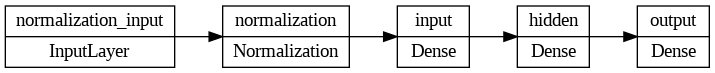

In [20]:
plot_model(model, show_shapes = False, show_layer_names = True, rankdir = 'LR')
# rankdir = "TB"
# plot_model?

## 7. Training


In keras, fit() method is used to train the neural network model on a given dataset.

During training, the model will perform the following steps for each epoch:

Forward pass: The model takes the input data (x_train) and passes it through the neural network to generate predictions.

Computation of loss: The model computes the loss, which is a measure of how well the predictions match the true labels (y_train).

Backward pass (Backpropagation): The model calculates the gradients of the loss with respect to the model's parameters (weights and biases) using backpropagation.

Optimization: The optimizer adjusts the model's parameters based on the computed gradients to minimize the loss function.

In [21]:
%%time
h = model.fit(train_features, train_labels,
                   epochs = 100,
                   verbose = 0,
                   validation_split = 0.2)

CPU times: user 1min 42s, sys: 4.69 s, total: 1min 47s
Wall time: 1min 45s


## 8. Performance and evaluation

Instructions:

- Show the training and validation loss and accuracy plots
- Interpret the loss and accuracy plots (e.g. is there under- or over-fitting)
- Describe the final performance of the model with test set

Now that we have trained our model, we check that on average, how good is our model at classifying never-before-seen digits by computing average accuracy over the entire test set using evaluate() method in Keras.


Check what data we have in the h -structure.

In [22]:
h_dict = h.history
h_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

#### Plot the training and validation loss

In [23]:
def plot_loss(h):

    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

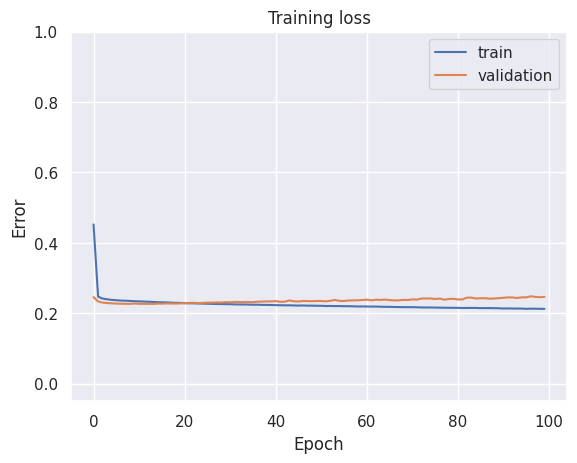

In [24]:
plot_loss(h)
plt.ylim(-0.05, 1);

#### Plot the training and validation accuracy

In [25]:
def plot_accuracy(h):

    plt.plot(h.history['binary_accuracy'], label='train')
    plt.plot(h.history['val_binary_accuracy'], label='validation')
    #plt.ylim([0, 10])
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

(0.5, 1.05)

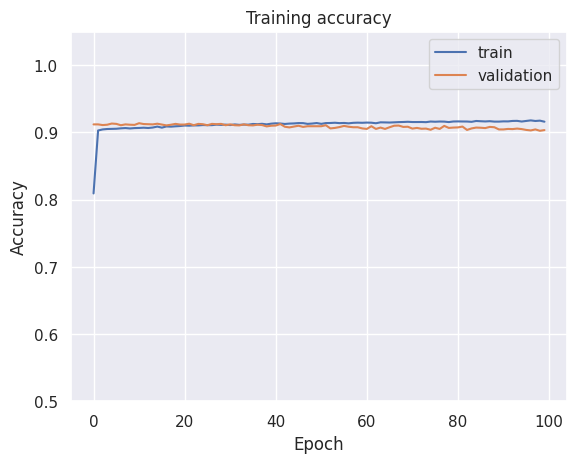

In [34]:
plot_accuracy(h)
plt.ylim(0.5, 1.05)

#### Evaluate the performance

Use the test dataset for evaluation

In [27]:
%%time
test_results = model.evaluate(test_features, test_labels, verbose=0)
print(test_results)

[0.26307278871536255, 0.8979244828224182]
CPU times: user 10.2 s, sys: 602 ms, total: 10.8 s
Wall time: 10.6 s


Print out the error(loss) and the total accuracy

In [28]:
print(f"Test results (loss):     {test_results[0]:.3f}")
print(f"Test results (accuracy): {test_results[1]:.3f}")

Test results (loss):     0.263
Test results (accuracy): 0.898


## 9. Evaluation and demonstration of metrics

First, we calculate the classification report and confusion matrix.


In [29]:
# Get predicted probabilities
test_pred_prob = model.predict(test_features)
print(f'Classification Report:')

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
test_pred = (test_pred_prob > 0.5).astype(int)

report = classification_report(test_labels, test_pred)
print(report)

7303/7303 [==============================] - 11s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    211688
         1.0       0.39      0.15      0.22     21992

    accuracy                           0.90    233680
   macro avg       0.65      0.56      0.58    233680
weighted avg       0.87      0.90      0.88    233680



`Note:`

**Precision:** Precision measures the proportion of true positive predictions out of all positive predictions made by the model.

* For class 0.0, the precision is 0.92, indicating that 96% of the predictions for class 0.0 are correct.
* For class 1.0, the precision is 0.39, meaning only 17% of the predictions for class 1.0 are correct.

**Recall:** Recall (also known as sensitivity) measures the proportion of true positive predictions out of all actual positive instances in the data.

* For class 0.0, the recall is 0.98, indicating that 57% of the actual instances of class 0.0 were correctly predicted by the model.
* For class 1.0, the recall is 0.15, meaning 80% of the actual instances of class 1.0 were correctly predicted by the model.

**F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

* For class 0.0, the F1-score is 0.95, indicating a decent balance between precision and recall for class 0.0.
* For class 1.0, the F1-score is 0.22, suggesting that the model struggles to balance precision and recall for class 1.0.

In [30]:
# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_pred)
print(conf_matrix)

[[206511   5177]
 [ 18676   3316]]


A confusion matrix is a table used in classification tasks to evaluate the performance of a machine learning model. It presents a summary of the predictions made by the model against the actual labels in a tabular format. Each cell in the matrix represents the count of instances where the model predicted a certain class compared to the true class.

**True Positives (TP):** The model correctly predicted 3316 instances as positive (e.g., correctly identified positive cases).

**False Positives (FP):** The model incorrectly predicted 18676 instances as positive (e.g., falsely identified negative cases as positive).

**True Negatives (TN):** The model correctly predicted 206511 instances as negative (e.g., correctly identified negative cases).

**False Negatives (FN):** The model incorrectly predicted 5177 instances as negative (e.g., falsely identified positive cases as negative).

The above confusion matrix suggests that the model has:

High false positives and low false negatives, indicating that the model is prone to making Type I errors (false alarms).

High true negatives and low true positives, which implies that the model may have difficulty identifying positive instances accurately.


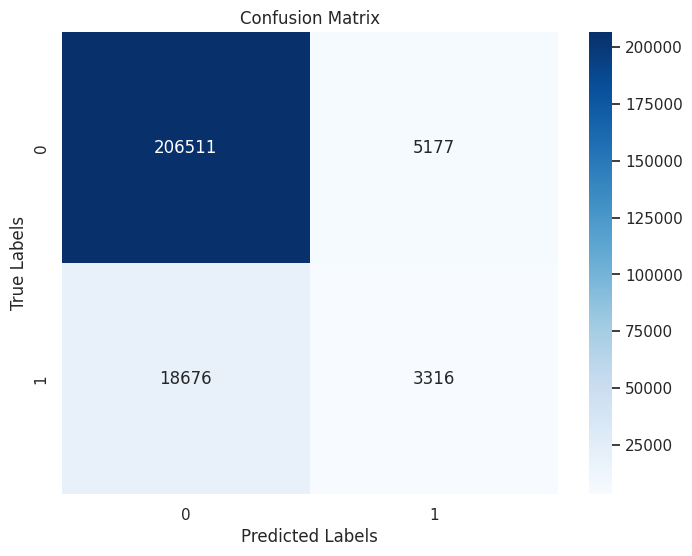

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<function confusion_matrix at 0x7e60cc0d5ea0>
True Positives:  3316
False Negatives:  5177
False positives:  18676
True Negatives:  206511


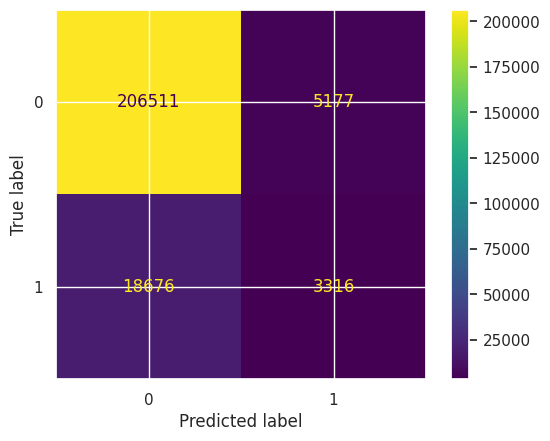

In [32]:
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
print(confusion_matrix)
print("True Positives: ", conf_matrix[1,1])
print("False Negatives: ", conf_matrix[0,1])
print("False positives: ", conf_matrix[1,0])
print("True Negatives: ", conf_matrix[0,0])

# ROC Curve


(0.0, 1.05)

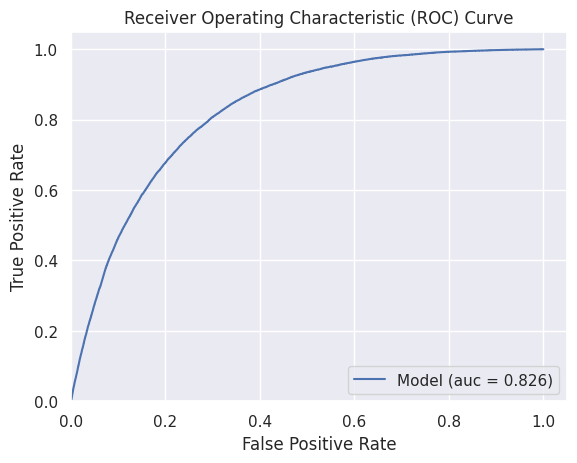

In [33]:
fpr, tpr, thresholds = roc_curve(test_labels, test_pred_prob)
auc = roc_auc_score(test_labels, test_pred_prob)
plt.plot(fpr, tpr, label='Model (auc = {:.3f})'.format(auc))
plt.legend(loc = 4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlim(0,)
plt.ylim(0,)

## 9. Discussion and conclusions

Instructions: Write

- What settings and models were tested before the best model was found
    - What where the results of these experiments
- Summary of  
    - What was your best model and its settings
    - What was the final achieved performance
- What are your main observations and learning points
- Discussion how the model could be improved in future

**Note:** Remember to evaluate the final metrics using the test set.


The **adam** optimizer with default settings was used. The model started overfit after 30 epochs, so it might be advisable to cut the training about 30 epochs. The effect of batch size was not evaluated.

Totally ~90% of accuracy for the test dataset was achieved with simple three layer classifier (21 neurons in input layer, 5 in hidden, and 1 in output layer).

The model might be tuned by using less epochs to train the model and then even higher accuracy might be achieved.